In [ ]:
import sys
import os
import cv2
import dlib
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow

## Align images to 112x112 pixels with 5 facial landmarks

### facial landmarks 찾기 
https://a292run.tistory.com/entry/Facial-Landmarks-for-Face-Recognition-with-Dlib-1  
- dlib: 얼굴 랜드마크 탐지기  
- 68개의 랜드마크를 찾아줌. -> Magface는 5개의 landmark만 필요로 함.   

In [ ]:
# !wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 # DOWNLOAD LINK

# !bunzip2 /content/drive/MyDrive/metasoul/MagFace/shape_predictor_68_face_landmarks.dat.bz2

# datFile =  "/content/drive/MyDrive/metasoul/MagFace/shape_predictor_68_face_landmarks.dat"

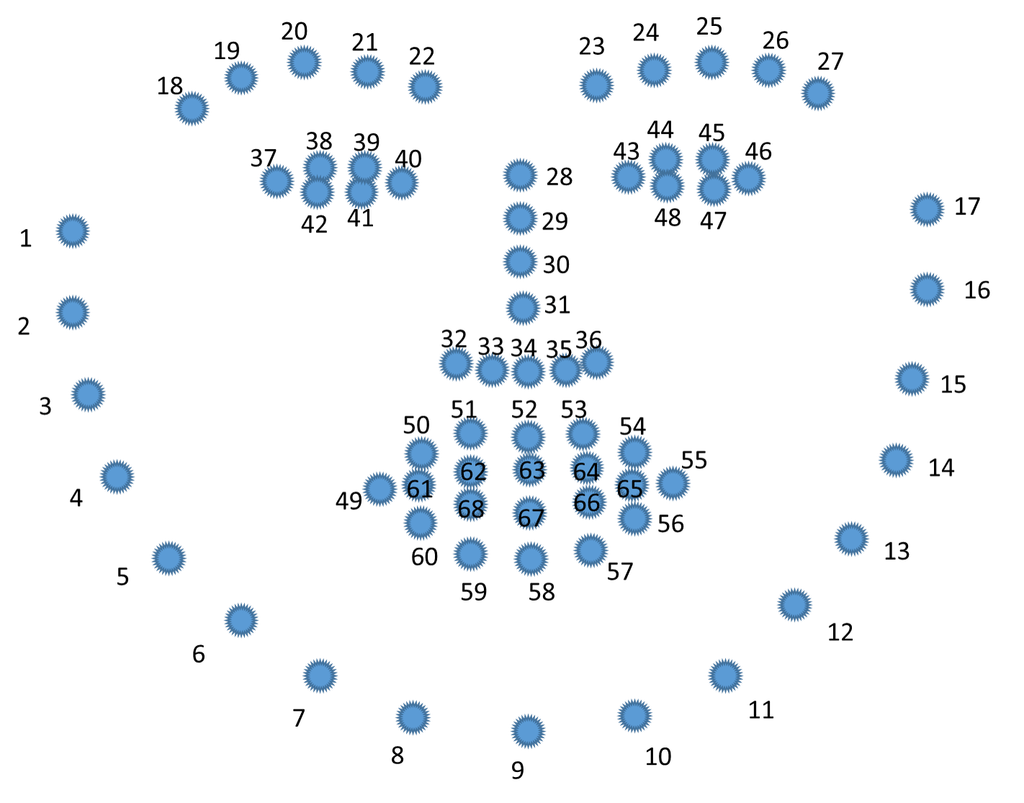

In [ ]:
# 68개의 landmark
from IPython.display import Image
Image('/content/drive/MyDrive/metasoul/MagFace/image/68landmark.png', height = 300, width = 300)

# 직접 해보니까 아래 번호랑 좀 다르게 부여해야 함. -> 숫자가 0부터 시작해야 해서 1씩 빼야 함.

In [ ]:
# 랜드마크 탐지기 load
face_detector = dlib.get_frontal_face_detector() # 정면 사진을 가지고 detection하겠다
landmark_detector = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") # 68개의 점을 가지고 옴.

### Reading the image

In [ ]:
def read_img(img_path):
    #read with dlib 
    img = dlib.load_rgb_image(img_path) 
    img_for_show = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #read with opencv 
    # img = cv2.imread(img_path)[:,:,::-1]

    return img, img_for_show

### face detection & landmark detections

In [ ]:
# 이미지 별로 랜드마크 찾아줌.
def landmark_detection(img_path):
    img, img_for_show = read_img(img_path)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector(gray, 1) # upscale: 한 번을 하면 큰 이미지를 인식함.

    landmark_list = []
    RIGHT_EYE = list(range(36, 42))
    LEFT_EYE = list(range(42, 48))
    EYES = list(range(36, 48))

    for k, d in enumerate(faces):  # 얼굴 마다
        landmarks = landmark_detector(img, d) 
        # 오른쪽 눈
        x_right_sum = 0
        y_right_sum = 0
        for n in RIGHT_EYE:
            x_right_sum += landmarks.part(n).x 
            y_right_sum += landmarks.part(n).y 

        x_right = int(x_right_sum / 6)
        y_right = int(y_right_sum / 6)
        right_eye_center = [x_right, y_right]
        landmark_list.append(right_eye_center) 
        cv2.circle(img_for_show, (x_right, y_right), 2, (255, 255, 0), -1)

        # 왼쪽 눈
        x_left_sum = 0
        y_left_sum = 0
        for n in LEFT_EYE:
            x_left_sum += landmarks.part(n).x 
            y_left_sum += landmarks.part(n).y 

        x_left = int(x_left_sum / 6)
        y_left = int(y_left_sum / 6)
        left_eye_center = [x_left, y_left]
        landmark_list.append(left_eye_center) 
        cv2.circle(img_for_show, (x_left, y_left), 2, (255, 255, 0), -1)

        # 코: 33, 입, 48, 54
        for n in [33, 48, 54]: 
            x = landmarks.part(n).x 
            y = landmarks.part(n).y 
            landmark_list.append([x, y]) 
            cv2.circle(img_for_show, (x, y), 2, (255, 255, 0), -1)

    landmark_array = np.array(landmark_list)
    return landmark_array, img_for_show

### Align images to 112x112 pixels
face_align.py  
https://github.com/deepinsight/insightface/blob/cdc3d4ed5de14712378f3d5a14249661e54a03ec/python-package/insightface/utils/face_align.py  

In [ ]:
sys.path.append("/content/drive/MyDrive/metasoul/MagFace")
import face_align

**# 얼굴 외 공간이 너무 많이 포함된 듯함. -> 이 부분 수정 필요?**

In [ ]:
# norm_crop: 얼굴 부분만 자르고, 얼굴 돌림.
def face_alignment(img_path):
    img_landmark_array, img_for_show = landmark_detection(img_path)
    wraped = face_align.norm_crop(img_for_show, img_landmark_array)
    return wraped